<a href="https://colab.research.google.com/github/kratikajawariya28/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised




##### **Contribution**    - Team
##### **Team Member 1 -** Kratika Jawariya
##### **Team Member 2 -** Dharmendra Yadav
##### **Team Member 3 -** Pranita Tiwari


# **Project Summary -**

\Write the summary here within 500-600 words.

The objective of this project was to address a text clustering challenge involving the categorization and grouping of Netflix shows, encompassing both movies and TV shows. The dataset, comprising approximately 7787 records and 11 attributes, provided a comprehensive view of the content available on the platform.

The data wrangling process for the Netflix Movies and TV Shows project involved systematic steps to enhance dataset quality. Null values were managed by imputing 'Unknown' for 'director' and 'cast,' using mode for 'country,' and dropping select missing values. Unnesting operations were conducted on key features like 'director,' 'cast,' 'listed_in,' and 'country,' facilitating a more granular analysis. Typecasting ensured consistent data formats, with 'duration' converted to an integer and 'date_added' to datetime. Rating categories were streamlined into five bins, addressing coded variations. Finally, data was split into 'df_movies' and 'df_tvshows' for focused analysis on each content type. These steps collectively prepare the dataset for robust analysis and interpretation.

The Exploratory Data Analysis (EDA) for the Netflix Movies and TV Shows project unveiled insightful patterns within the dataset. It was revealed that Netflix features a higher proportion of movies than TV shows, with a notable surge in content additions. Most shows originate from the United States. EDA also highlighted the need for data preprocessing, including handling null values and typecasting for improved analysis. Further insights emerged from the distribution of content across genres, countries, and ratings. These findings provide a foundational understanding of the dataset, guiding subsequent steps in clustering and recommendation system development for an enriched user experience.

In the feature engineering phase of the Netflix TV Shows and Movies project, the focus was on preparing textual data for analysis. The process involved several key steps, starting with the removal of stop words and punctuation, followed by text normalization through lemmatization. Subsequently, tokenization and vectorization were applied to represent the textual information in a format suitable for machine learning. To address dimensionality challenges, Principal Component Analysis (PCA) was employed, reducing the data's complexity while retaining essential information. This streamlined data preparation sets the stage for the application of machine learning models, ensuring that the dataset is optimized for effective analysis and clustering.

In implementing machine learning models for the Netflix TV Shows and Movies project, two distinct techniques were applied: Hierarchical Clustering and K-Means Clustering. Hierarchical Clustering involved creating clusters in a hierarchical structure, and the optimal number of clusters (7) was determined through dendrogram visualization. On the other hand, K-Means Clustering was applied to construct clusters with the optimal count of 6, identified using the elbow method and Silhouette score analysis. These techniques provided a comprehensive understanding of content relationships and groupings within the dataset, enhancing the project's capacity for insightful content categorization and recommendation system development.

In summary, this project delved into the intricate landscape of Netflix movies and TV shows, employing advanced techniques in data analysis and clustering to reveal patterns and provide a basis for a content-based recommender system. The findings contribute to a deeper understanding of the platform's content distribution and user preferences, ultimately enhancing the overall streaming experience for Netflix users.
This project benefits the company by refining content recommendations through show clustering, improving user satisfaction and retention. Data-driven insights offer valuable information on user preferences and content trends. Techniques like feature engineering optimize data for efficient machine learning. The project's outcomes empower the company to stay competitive by aligning content strategy with evolving consumer preferences, ensuring a personalized and engaging streaming experience.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The project addresses the need for a more precise content recommendation system for Netflix TV Shows and Movies. The problem involves conducting Exploratory Data Analysis (EDA) to understand user preferences and behaviors. The project focuses on implementing advanced clustering techniques to group similar content based on text-based features, ensuring that recommended content is both personalized and relevant, ultimately improving the overall streaming experience for users.**


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# For data manipulation and visualisation
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline

# Text cleaning and preprocessing
import string
string.punctuation        # String library
import re               # Regular expression
import nltk             # Natural language tool-kit
nltk.download('punkt')    # Downloading stopwords
from nltk.corpus import stopwords       #Stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
path = "/content/mydrive/MyDrive/Almabetter/Capstone/Clustering | Netflix/Netflix.csv"
df = pd.read_csv(path)



### Dataset First View

In [ ]:
# Dataset First look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False,False,False,False,False
7784,False,False,False,True,False,True,False,False,False,False,False,False
7785,False,False,False,True,False,False,False,False,False,False,False,False


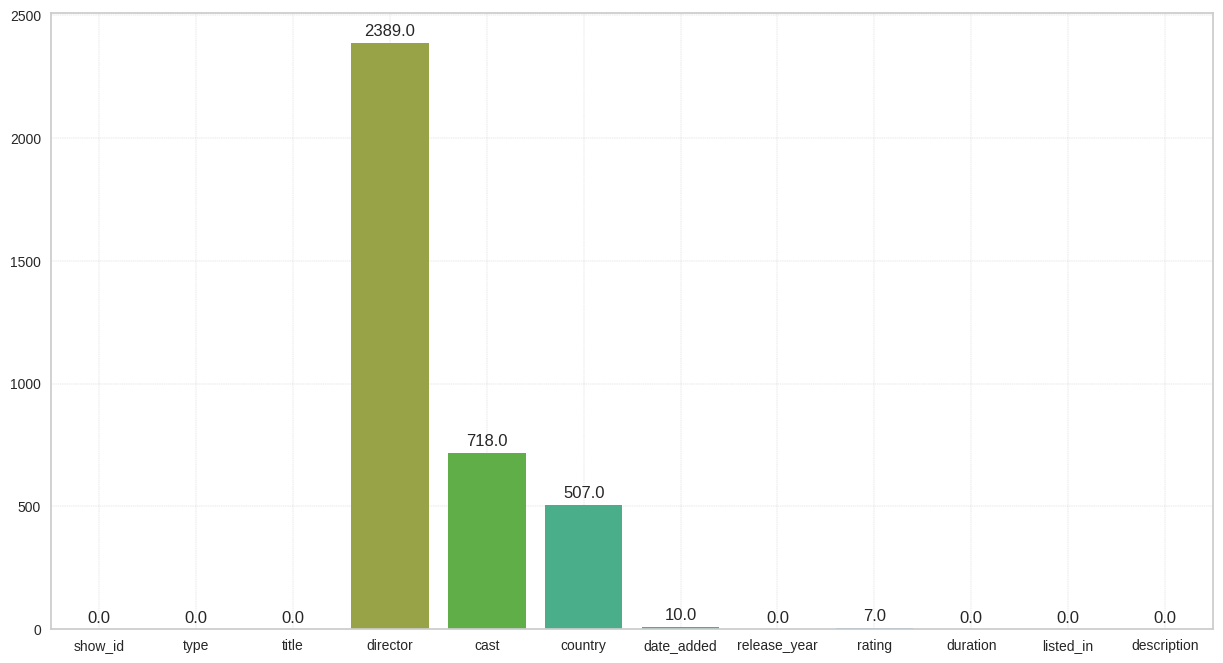

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=df.columns,y=df.isna().sum())
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0,8),
                   textcoords='offset points')
plt.show()

### What did you know about your dataset?

The Netflix Movies and TV Shows Clustering Dataset consists of 12 columns, with only one column having an integer data type. There are no duplicate values in the dataset. However, null values are present in five columns: director, cast, country, date_added, and rating. This dataset is valuable for exploring trends in Netflix content, and it can aid in developing clustering models to group similar titles together. The clustering is based on shared attributes like genre, country of origin, and rating, providing insights into the diverse offerings of movies and TV shows on Netflix.






## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# Dataset Describe
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

**show_id**: Unique identifier for each movie/show.

**type:** Indicates whether the entry is a movie or a TV show.

**title:** Name of the movie or TV show.

**director:** Name of the director(s) of the movie or TV show.

**cast:** Names of the actors and actresses featured in the movie or TV show.

**country:** Country or countries where the movie or TV show was produced.

**date_added:** Date when the movie or TV show was added to Netflix.

**release_year:** Year when the movie or TV show was released.

**rating:** TV rating or movie rating of the movie or TV show.

**duration:** Length of the movie or TV show in minutes or seasons.

**listed_in:** Categories or genres of the movie or TV show.

**description:** Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

The number of unique values in: 
-----------------------------------
'show_id' : 7787
'type' : 2
'title' : 7787
'director' : 4049
'cast' : 6831
'country' : 681
'date_added' : 1565
'release_year' : 73
'rating' : 14
'duration' : 216
'listed_in' : 492
'description' : 7769


## ***3. Data Wrangling***

#### **3.1 Handling Null values from each feature**

In [ ]:
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Let's find out the percentage of null values in each category in order to deal with it.
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64%
--------------------------------------------------


In [ ]:
df["date_added"].value_counts()

January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: date_added, Length: 1565, dtype: int64

In [ ]:
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [ ]:
## Imputing null value as per our discussion
# imputing with unknown in null values of director and cast feature
df[['director','cast']]=df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
df['country']=df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

In [ ]:
# Rechecking the Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Rechecking the percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64%
--------------------------------------------------


#### **3.2 Handling nested columns** (i.e. 'director', 'cast', 'listed_in', and, 'country')

In [ ]:
# Let's create a copy of dataframe and unnest the original one
df_new= df.copy()

In [ ]:
# Unnesting function
def unnest(df, col, col_name):
  dir_constraint=df[col].apply(lambda x: str(x).split(', ')).tolist()
  temp_df = pd.DataFrame(dir_constraint, index = df['title'])
  temp_df = temp_df.stack()
  temp_df = pd.DataFrame(temp_df.reset_index())
  temp_df.rename(columns={0:col_name},inplace=True)
  temp_df = temp_df.merge(df[['type', 'title']], on = ['title'],how='left')
  temp_df = temp_df.drop(['level_1'],axis=1)
  return temp_df


In [ ]:
# Unnesting director column
df1 = unnest(df, 'director', 'Directors')
df1.head(10)

,title,Directors,type
0,3%,Unknown,TV Show
1,7:19,Jorge Michel Grau,Movie
2,23:59,Gilbert Chan,Movie
3,9,Shane Acker,Movie
4,21,Robert Luketic,Movie
5,46,Serdar Akar,TV Show
6,122,Yasir Al Yasiri,Movie
7,187,Kevin Reynolds,Movie
8,706,Shravan Kumar,Movie
9,1920,Vikram Bhatt,Movie


In [ ]:
# Unnesting actor column
df2 = unnest(df, 'cast', 'Actors')
df2.head(10)

,title,Actors,type
0,3%,João Miguel,TV Show
1,3%,Bianca Comparato,TV Show
2,3%,Michel Gomes,TV Show
3,3%,Rodolfo Valente,TV Show
4,3%,Vaneza Oliveira,TV Show
5,3%,Rafael Lozano,TV Show
6,3%,Viviane Porto,TV Show
7,3%,Mel Fronckowiak,TV Show
8,3%,Sergio Mamberti,TV Show
9,3%,Zezé Motta,TV Show


In [ ]:
# Unnesting genre column
df3  = unnest(df, 'listed_in', 'Genre')
df3.head(10)

,title,Genre,type
0,3%,International TV Shows,TV Show
1,3%,TV Dramas,TV Show
2,3%,TV Sci-Fi & Fantasy,TV Show
3,7:19,Dramas,Movie
4,7:19,International Movies,Movie
5,23:59,Horror Movies,Movie
6,23:59,International Movies,Movie
7,9,Action & Adventure,Movie
8,9,Independent Movies,Movie
9,9,Sci-Fi & Fantasy,Movie


In [ ]:
# Unnesting country column
df4 = unnest(df, 'country', 'Country')
df4.head(10)

,title,Country,type
0,3%,Brazil,TV Show
1,7:19,Mexico,Movie
2,23:59,Singapore,Movie
3,9,United States,Movie
4,21,United States,Movie
5,46,Turkey,TV Show
6,122,Egypt,Movie
7,187,United States,Movie
8,706,India,Movie
9,1920,India,Movie


#### **3.3 Typecasting of attributes**


In [ ]:
# Checking info of the dataset before typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


In [ ]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

# Typecasting string object to datetime object of date_added column
df['date_added']= pd.to_datetime(df['date_added'])

# Extracting date, day, month and year from date_added column
df["day_added"]= df["date_added"].dt.day
df["month_added"]= df["date_added"].dt.month
df["year_added"]= df["date_added"].dt.year

# Dropping date_added
df.drop('date_added', axis=1, inplace=True)

In [ ]:
# Checking info of the dataset after typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   release_year  7770 non-null   int64 
 7   rating        7770 non-null   object
 8   duration      7770 non-null   int64 
 9   listed_in     7770 non-null   object
 10  description   7770 non-null   object
 11  day_added     7770 non-null   int64 
 12  month_added   7770 non-null   int64 
 13  year_added    7770 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 910.5+ KB


#### **3.4 Binning of Rating attribute**


In [ ]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()


array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [ ]:
# Checking head after binning
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adult Content,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adult Content,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adult Content,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teen Content,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teen Content,123,Dramas,A brilliant group of students become card-coun...,1,1,2020


### What all manipulations have you done and insights you found?

We've organized the data wrangling process into four distinct sections:

**1. Handling Null Values:**
In this phase, we addressed null values in the following manner:

* Imputed 'Unknown' for 'director' and 'cast'.
* Imputed with the mode for the 'country'.
* Dropped null values in 'date_added' and 'rating' (those with a lower percentage).


**2. Unnesting Values:**
We performed unnesting on the following features:

* 'director'
* 'cast'
* 'listed_in'
* 'country'

The values were separated into different dataframes and then merged using a left join to isolate each feature's values.

**3. Typecasting:**
We adjusted the data types of the following features:

- 'duration' was converted to an integer (excluding 'min' and 'seasons' from the values).
- 'date_added' was converted to datetime in the required format.
- Feature Extraction:
Additional features were extracted from 'date_added':
'date'
'month'
'year'

**4. Rating Categorization:**
Given the varied coded categories in the 'rating' column, we created five bins to distribute values:
- Adult: TV-MA, NC-17
- Restricted: R, UR
- Teen: PG-13, TV-14
- All Ages: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG
- Not Rated: NR

These steps ensure that the data is well-prepared for further analysis, with features appropriately handled, types casted, and categories simplified for ease of interpretation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 Relative percentage of total number of Movies and TV Shows**


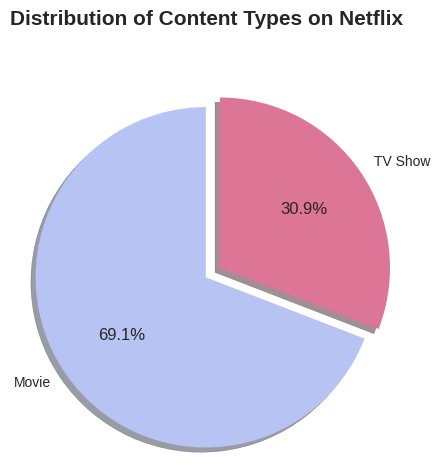

In [ ]:
# Chart - 1 visualization code

# Create a DataFrame of the count of each unique value in the 'type' column
type_counts = df['type'].value_counts()
plt.figure(figsize=(5,5))
plt.suptitle('Distribution of Content Types on Netflix', weight='bold', y=1.02, size=15)
# Create a pie chart of the 'type' column
plt.pie(type_counts, labels=type_counts.index, colors=['#B7C3F3','#DD7596'],explode=(0, 0.1),shadow=True, autopct='%1.1f%%',startangle=90)
# plt.title('Distribution of Content Types on Netflix')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

- Pie charts are effective for showing the proportion of different categories in a whole, making it easy to observe the relative contribution of each category to the entire dataset.

##### 2. What is/are the insight(s) found from the chart?

- The dataset contains a higher percentage of movies (69.14%) compared to TV shows (30.86%).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Understanding the content distribution can aid in content acquisition or production decisions. If a streaming platform, for instance, sees that movies are more popular in the dataset, they might consider investing more in acquiring or producing movie content.

#### **Chart - 2 Rating type**

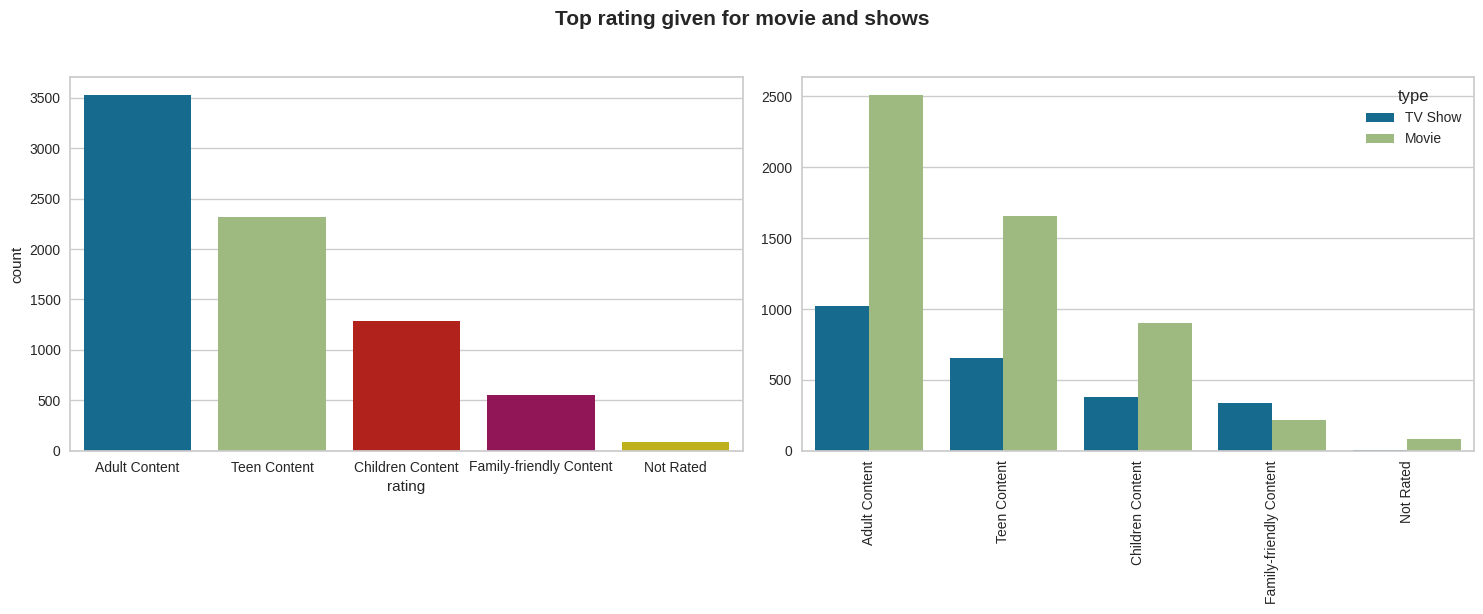

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
ax[1].set(xlabel=None, ylabel= None)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- This chart type effectively illustrates the distribution of content across various age demographics.

##### 2. What is/are the insight(s) found from the chart?

- The specific insight gained is that the majority of shows cater to the needs of the **adult and teen** population. This observation is made based on the higher frequency of shows in age categories associated with these demographics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- **Targeted Content Strategy:** Understanding the dominant age groups allows for a targeted content strategy. Platforms can invest in acquiring or producing content that aligns with the preferences of the adult and young adult audience, enhancing user satisfaction.


- **Marketing and Promotion:** The insight can inform marketing and promotional efforts, allowing platforms to tailor campaigns to attract and retain the adult and young adult viewer base.

#### **Chart - 3 Directors**

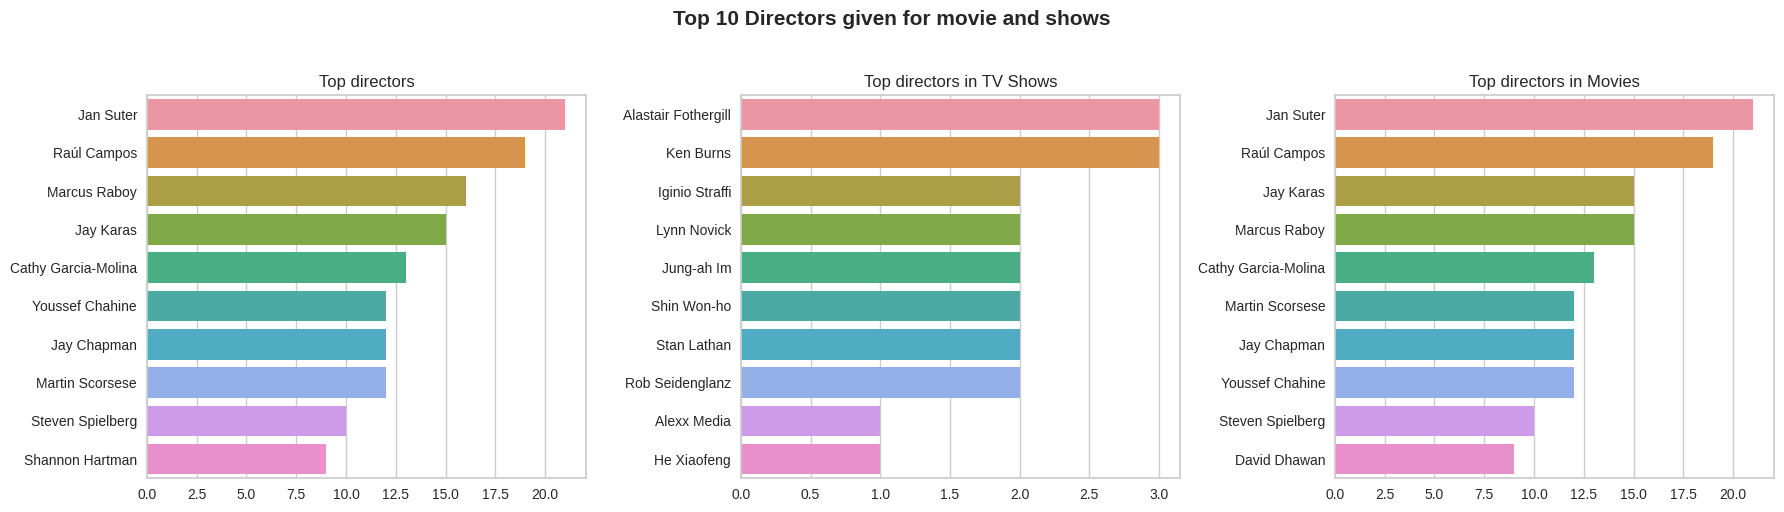

In [ ]:
# Method 1
df1 = df1[df1['Directors'] != 'Unknown']
df1_tv = df1[df1["type"] == "TV Show"]
df1_movie = df1[df1["type"] == "Movie"]

fig, ax = plt.subplots(1,3, figsize = (18, 5))
plt.suptitle('Top 10 Directors given for movie and shows', weight='bold', y=1.02, size=15)

sns.countplot(y ="Directors", data=df1, order=df1['Directors'].value_counts().index[0:10], ax = ax[0])
ax[0].set_title('Top directors')
ax[0].set(xlabel=None, ylabel= None)

sns.countplot(y = "Directors", data=df1_tv, order=df1_tv['Directors'].value_counts().index[0:10], ax=ax[1])
ax[1].set_title('Top directors in TV Shows')
ax[1].set(xlabel=None, ylabel= None)

sns.countplot(y = "Directors", data=df1_movie, order=df1_movie['Directors'].value_counts().index[0:10], ax=ax[2])
ax[2].set_title('Top directors in Movies')
ax[2].set(xlabel=None, ylabel= None)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- Bar chart is appropriate for visualizing and comparing the number of shows directed by the top directors. This chart type allows for a clear representation of the directors' ranking and the magnitude of their contributions.

##### 2. What is/are the insight(s) found from the chart?

- Jan Suter have directed more than 20 movies
- Alastair Fothergill have directed 3 TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Highlighting the involvement of top directors in promotional materials can enhance the marketability of the content.

#### **Chart - 4 Country**

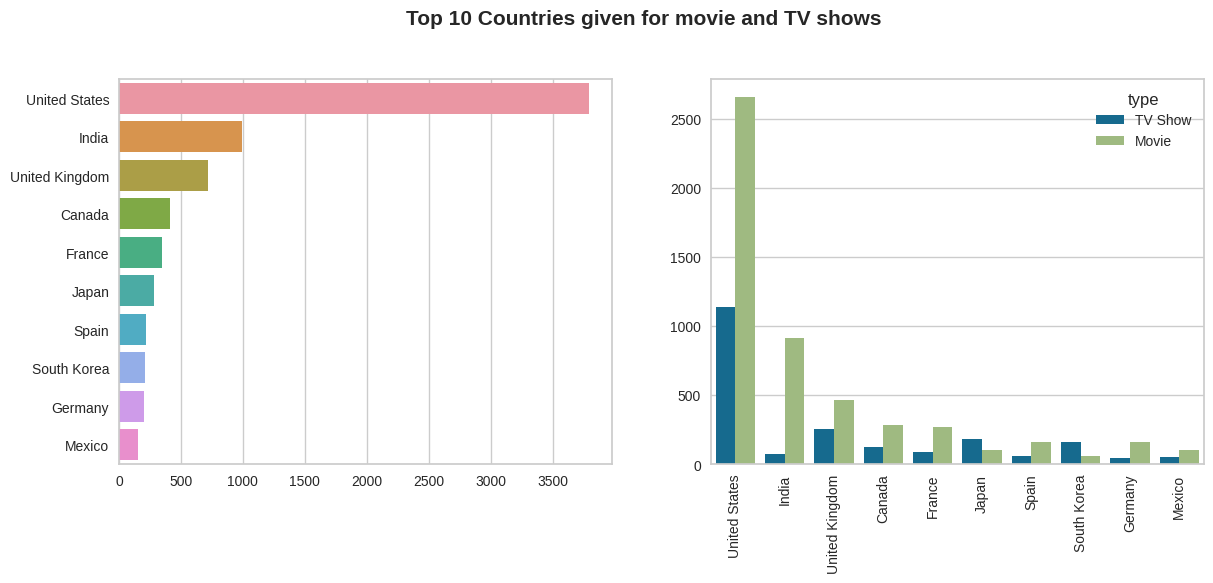

In [ ]:
# Chart - 4 visualization code
fig, ax = plt.subplots(1,2, figsize=(14,5))
plt.suptitle('Top 10 Countries given for movie and TV shows', weight='bold', y=1.02, size=15)
df4 = df4[df4['Country'] !='Unknown']
df_country_count = df4['Country'].value_counts().nlargest(10).reset_index()
df_country_count.columns = ['Country', 'count']
sns.barplot(y = 'Country', x = 'count', data = df_country_count, ax = ax[0])
ax[0].set(xlabel=None, ylabel= None)

sns.countplot(x="Country", data=df4, hue='type', order=df4['Country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
ax[1].set(xlabel=None, ylabel= None)

plt.show()

##### 1. Why did you pick the specific chart?

- Bar chart is suitable for visualizing and comparing the number of movies/TV shows produced by the top countries.

##### 2. What is/are the insight(s) found from the chart?

- The largest number of movies or TV shows originated from the United States, with India and the United Kingdom following closely behind.
- In India, the number of movies is much higher than TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Knowledge of the dominant countries can inform targeted marketing efforts, helping platforms reach audiences with a preference for content from specific regions.

#### **Chart - 5 Actors**

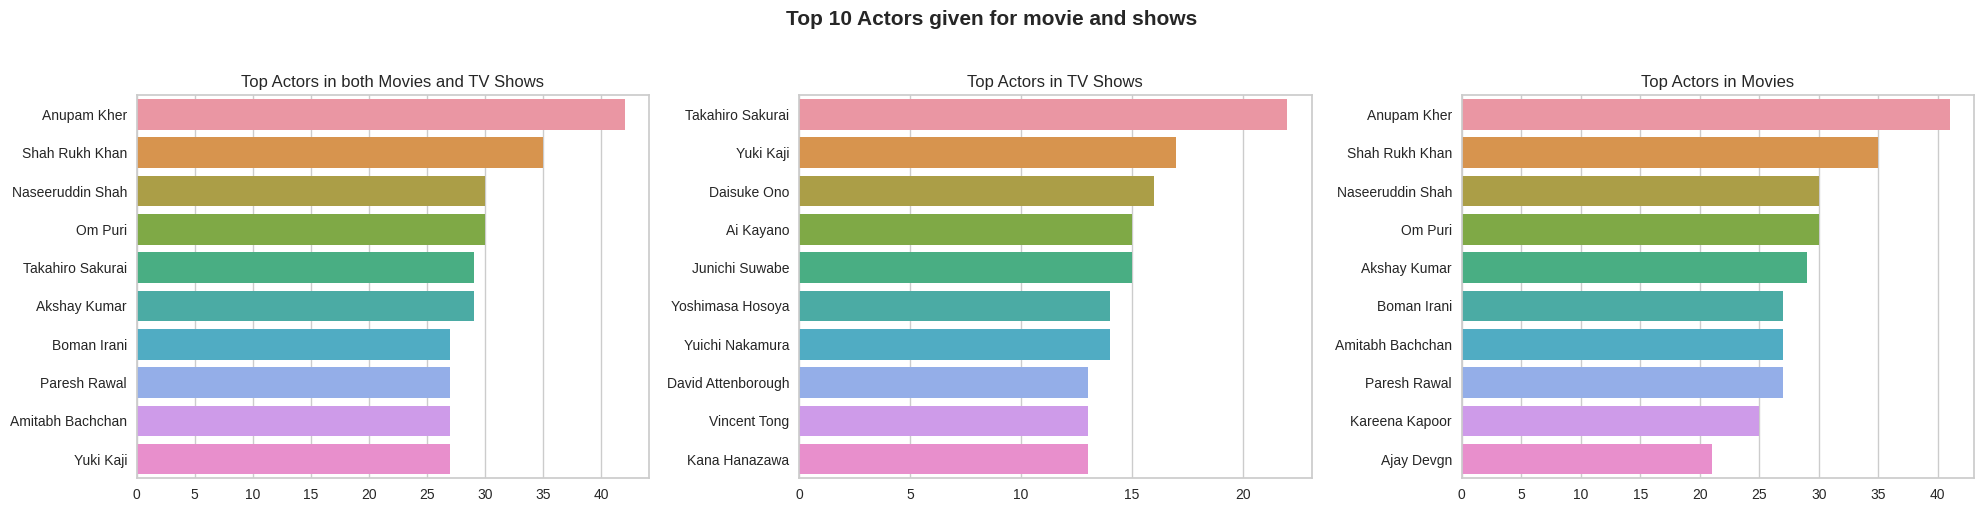

In [ ]:
# Chart - 5 visualization code
df2 = df2[df2['Actors'] !='Unknown']
df2_tv = df2[df2["type"] == "TV Show"]
df2_movie = df2[df2["type"] == "Movie"]

fig, ax = plt.subplots(1,3, figsize=(20,5))
plt.suptitle('Top 10 Actors given for movie and shows', weight='bold', y=1.02, size=15)

sns.countplot(y ="Actors", data=df2, order=df2['Actors'].value_counts().index[0:10], ax=ax[0])
ax[0].set_title('Top Actors in both Movies and TV Shows')
ax[0].set(xlabel=None, ylabel= None)

sns.countplot(y ="Actors", data=df2_tv, order=df2_tv['Actors'].value_counts().index[0:10], ax=ax[1])
ax[1].set_title('Top Actors in TV Shows')
ax[1].set(xlabel=None, ylabel= None)

sns.countplot(y="Actors", data=df2_movie, order=df2_movie['Actors'].value_counts().index[0:10], ax=ax[2])
ax[2].set_title('Top Actors in Movies')
ax[2].set(xlabel=None, ylabel= None)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- Bar plot is plotted to compare the count of the actors in TV Shows and Movies seprately.

##### 2. What is/are the insight(s) found from the chart?

- Anupam Kher is prominent in the majority of movies in the Netflix dataset.
- Takahiro Sakurai stands out for his substantial involvement in TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Knowing which actors are prominently featured in each category enables content creators and strategists to leverage popular figures for targeted marketing and audience engagement. It enhances the platform's ability to tailor recommendations based on user preferences, potentially increasing user satisfaction and retention.

- However, it's important to note that without additional context or specific metrics related to audience reception, it's challenging to conclusively determine negative growth. If, for example, audience fatigue or dissatisfaction is associated with the extensive presence of these actors, it could potentially lead to negative impacts on user engagement and growth. Careful monitoring and analysis of user feedback and viewing patterns are essential to evaluate the true business implications of these insights.







#### **Chart - 6 Genre**

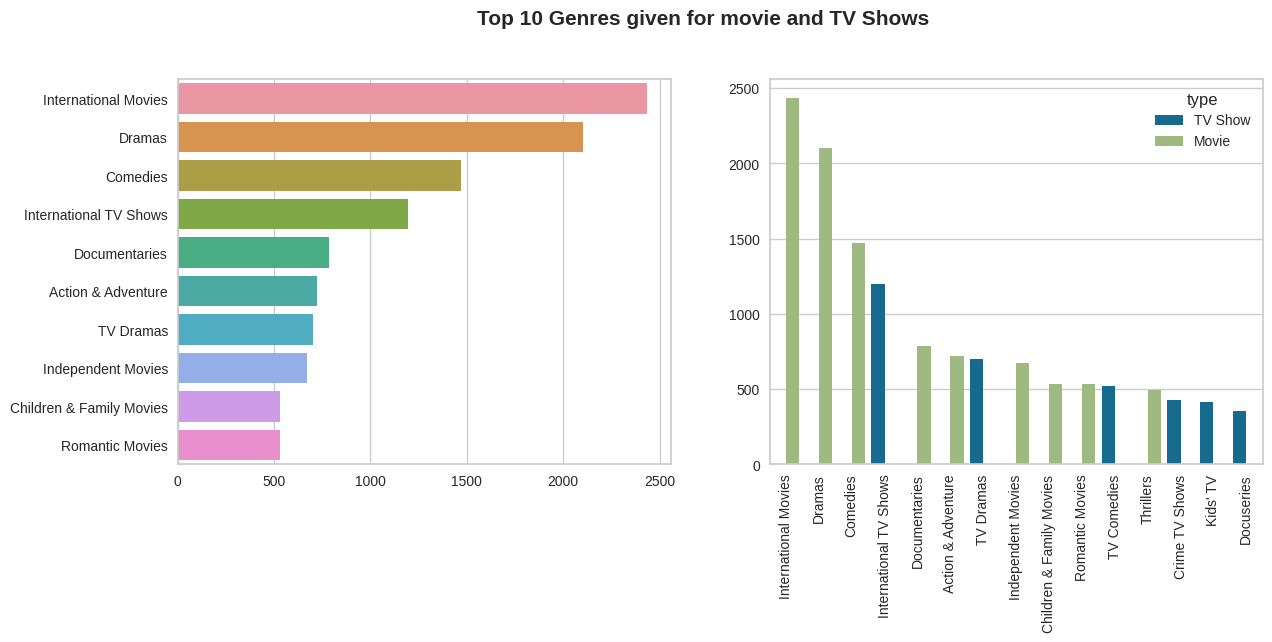

In [ ]:
# Chart - 8 visualization code
fig, ax = plt.subplots(1,2, figsize=(14,5))
plt.suptitle('Top 10 Genres given for movie and TV Shows', weight='bold', y=1.02, size=15)

df_genre_count = df3[df3['Genre'] !='Unknown']['Genre'].value_counts().nlargest(10).reset_index()
df_genre_count.columns = ['Genre', 'count']
sns.barplot(y = 'Genre', x = 'count', data = df_genre_count, ax = ax[0])
ax[0].set(xlabel=None, ylabel= None)

sns.countplot(x="Genre", hue='type', data=df3, order=df3['Genre'].value_counts().index[0:15], ax=ax[1])
ax[1].set(xlabel=None, ylabel= None)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

- This type of chart is effective in showcasing the top genres in terms of the number of movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

- **International Movies** emerge as the most popular genre, closely followed by **drama and comedies.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- **Content Curation:**  Knowing the most popular genres helps in curating and acquiring content that aligns with audience preferences. Platforms can focus on securing and promoting content in the top genres to attract a larger viewership.


- **Marketing Strategy:**   This insight can inform marketing strategies, allowing platforms to highlight the prevalence of popular genres in promotional materials to attract and retain subscribers.

#### **Chart - 7 Release year**

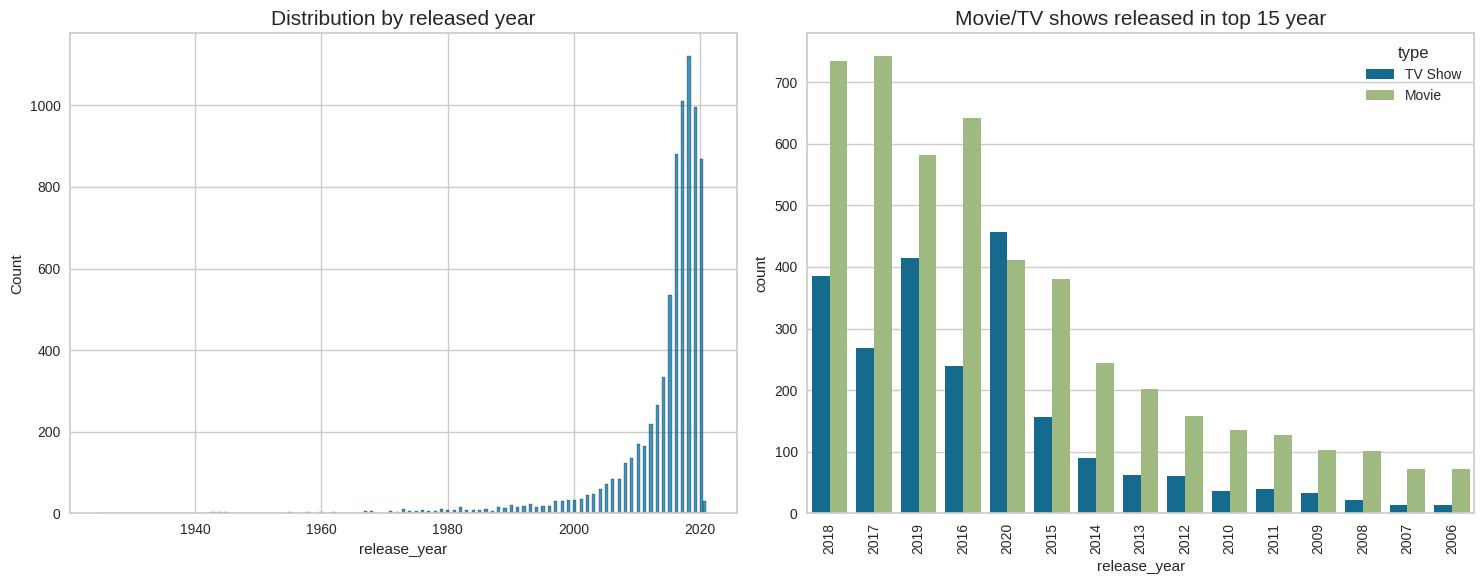

In [ ]:
# Chart - 6 visualization code
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

 - Histograms are effective for understanding the frequency or distribution of numerical data, in this case, the release years.

##### 2. What is/are the insight(s) found from the chart?

- Netflix boasts a larger quantity of recently released movies and TV shows compared to older content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Platforms may prioritize obtaining rights for content from these countries, recognizing their high production volume and potential popularity.

- Knowing that Netflix has a higher number of recent releases can inform content acquisition and production strategies. The platform may choose to invest more in new content to align with audience preferences for fresh and up-to-date material.Answer Here

#### **Chart - 8 Year added**

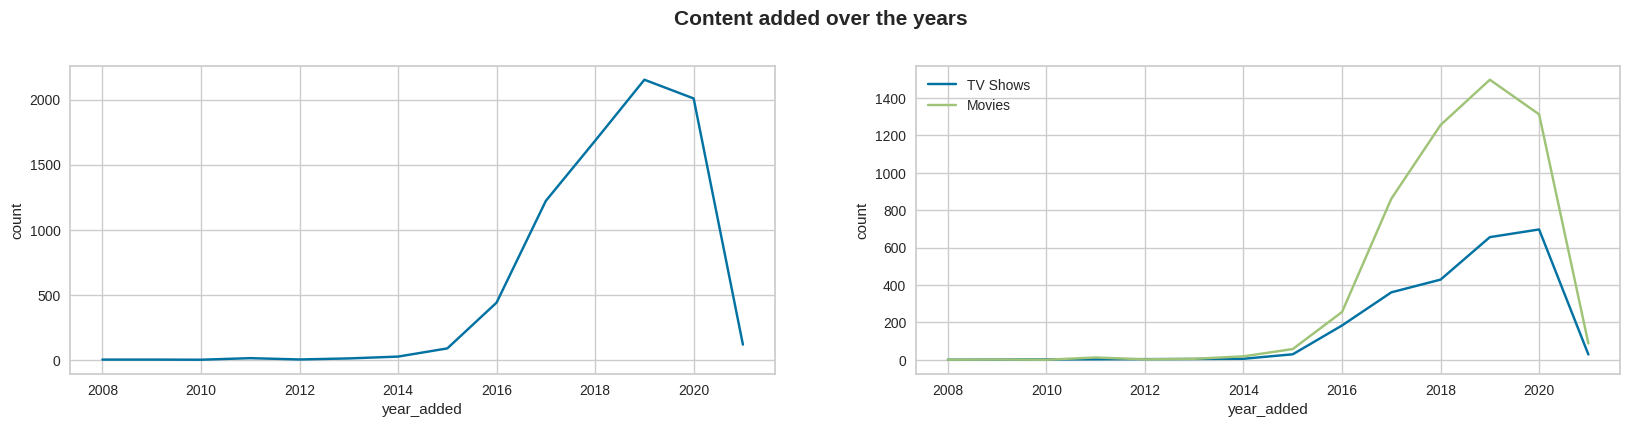

In [ ]:
# Chart - 2 visualization code
# Plot growth of the contents over the years.
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

fig,ax = plt.subplots(1,2, figsize=(20,4))
plt.suptitle('Content added over the years', weight='bold', y=1.02, size=15)

col = "year_added"

# Plot 1
df_year_added = df[col].value_counts().reset_index()
df_year_added = df_year_added.rename(columns = {col : "count", "index" : col})
df_year_added = df_year_added.sort_values(col)

trace1 = sns.lineplot(x=df_year_added[col], y=df_year_added["count"], ax = ax[0])

# Plot 2
content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace2 = sns.lineplot(x=content_1[col], y=content_1["count"], ax = ax[1], label = 'TV Shows')
trace3 = sns.lineplot(x=content_2[col], y=content_2["count"], ax = ax[1], label = 'Movies')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

The selected chart is a lineplot, which is appropriate for visualizing the number of movies and TV shows added over the years. The use of color differentiation (hue) for movie and TV show types allows for a clear comparison of trends.

##### 2. What is/are the insight(s) found from the chart?

- There is a consistent focus on adding more shows to the platform over the years.

- There was a decrease in the number of movies added in 2020, but this pattern did not extend to the number of TV shows added in the same year.

- This suggests a shift in focus, indicating that Netflix may be increasingly concentrating on introducing more TV series to its platform rather than movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Content Strategy:** The insight can inform content acquisition and production strategies. If the trend of focusing on TV series over movies continues, the platform can allocate resources accordingly to meet the growing demand for TV content.

**User Engagement:** Aligning content strategy with user preferences can enhance user engagement and satisfaction, potentially leading to increased subscriptions and viewer retention.

#### **Chart - 9 Month added**

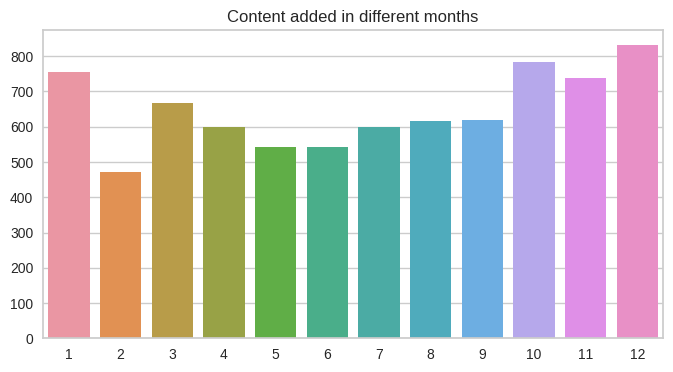

In [ ]:
# Chart - Number of shows added on different months
plt.figure(figsize=(8,4))
df_month = df['month_added'].value_counts().nlargest(12).reset_index()
df_month.columns = ['month_added', 'count']
ax = sns.barplot(x = 'month_added', y = 'count', data = df_month)
ax.set(xlabel=None, ylabel= None)
plt.title('Content added in different months')
plt.show()

##### 1. Why did you pick the specific chart?

The Bar chart is plotted to compare the content added in different months.

##### 2. What is/are the insight(s) found from the chart?

- Highest number of content is added in the month of **DEC (Mostly winter season)**.

#### **Chart - 10 Duration of TV Shows**

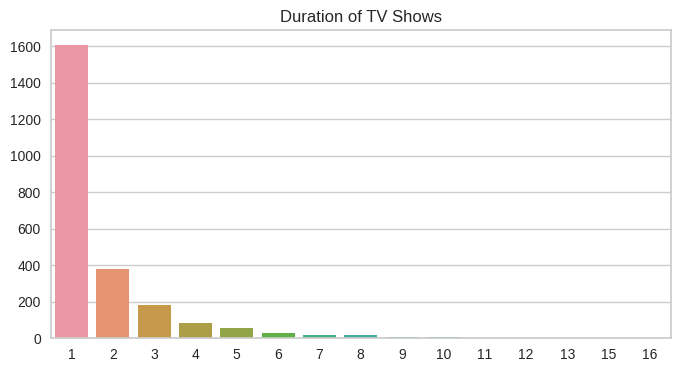

In [ ]:
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

plt.figure(figsize=(8,4))
df_show = tv_show['duration'].value_counts().reset_index()
df_show.columns = ['duration', 'count']
ax = sns.barplot(x = 'duration',  y = 'count', data = df_show)
ax.set(xlabel=None, ylabel= None)
plt.title('Duration of TV Shows')
plt.show()

##### 1. Why did you pick the specific chart?

- Bar plot is drawn to compare the duration of different TV Shows.

##### 2. What is/are the insight(s) found from the chart?

 - Most of the TV Shows are having only 1 season.

#### **Chart - 11 Duration of Movies**

In [ ]:
df_movie = pd.DataFrame()
df_movie['duration_binned'] = pd.cut(movie['duration'], bins=[0, 60, 120, 180, 240, 300, 360])
# print(df_movie['duration_binned'].value_counts())
df_movie = df_movie['duration_binned'].value_counts().reset_index()
df_movie.columns = ['duration_binned', 'count']

df_movie

,duration_binned,count
0,"(60, 120]",3916
1,"(120, 180]",973
2,"(0, 60]",445
3,"(180, 240]",36
4,"(240, 300]",1
5,"(300, 360]",1


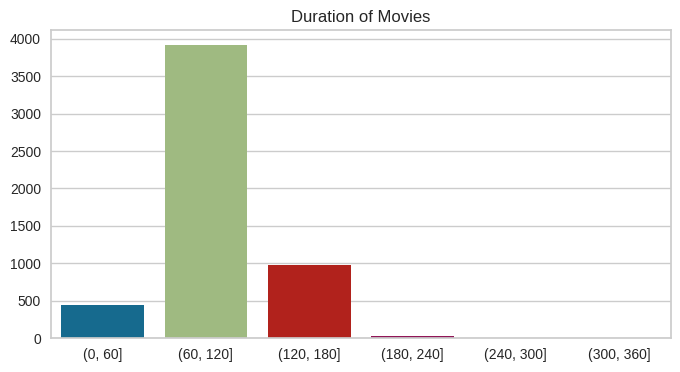

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = 'duration_binned',  y = 'count', data = df_movie)
ax.set(xlabel=None, ylabel= None)
plt.title('Duration of Movies')
plt.show()


##### 1. Why did you pick the specific chart?

- The bar plot is used in showing the duration of movies in different ranges.

##### 2. What is/are the insight(s) found from the chart?

- Majority of the movies are in range **60min to 120min**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- **Strategic Content Planning:** The understanding of movie duration distribution serves as valuable input for formulating content planning strategies. This insight aids in grasping the diverse range of movie lengths accessible on the platform, facilitating thoughtful decisions regarding content acquisition and production.

- **Enhanced User Experience:** Acknowledging the spectrum of movie durations empowers platforms to address a wide array of user preferences. This contributes to an improved overall user experience by accommodating viewers with different time constraints and preferences, creating a more inclusive and engaging environment.

#### **Chart - 12 Wordcloud for column Description**

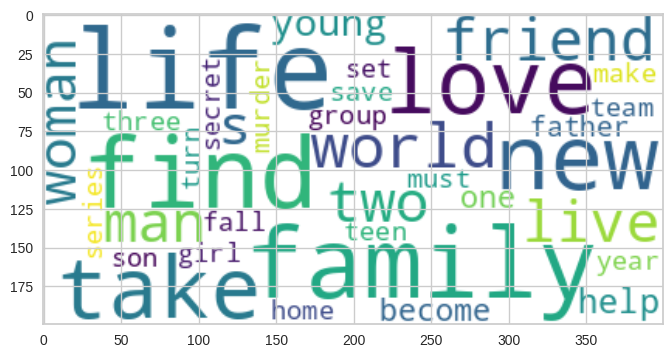

In [ ]:
# Chart - 12 visualization code
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

- Word cloud is used to show the most frequently occurring words.

##### 2. What is/are the insight(s) found from the chart?

- **Family and life** are the most frequently occuring words.

#### **Chart - 13 Wordcloud for title column**

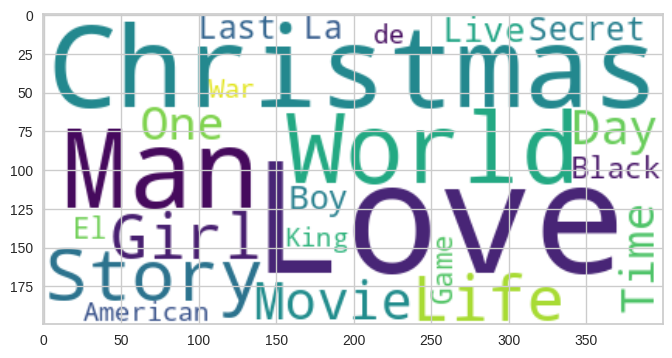

In [ ]:
# Chart - 13 visualization code
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

- Word cloud is used to show the most frequently occurring words.

##### 2. What is/are the insight(s) found from the chart?

- **Love, Man, Christmas** are the most occuring words in title.